## EDA And Feature Engineering Flight Price Prediction
### FEATURES
The various features of the cleaned dataset are explained below:
1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.
3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.
4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.
8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
10) Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
11) Price: Target variable stores information of the ticket price.

In [161]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [162]:
df= pd.read_excel('flight_price.xlsx')

In [163]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [164]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [165]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [166]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [167]:
df['Date_of_Journey'].str.split('/').str[0][0]

'24'

In [168]:
type(df['Date_of_Journey'].str.split('/').str[0][0])

str

In [169]:
df['Day']=df['Date_of_Journey'].str.split('/').str[0]

In [170]:
df['Month']=df['Date_of_Journey'].str.split('/').str[1]

In [171]:
df['Year']=df['Date_of_Journey'].str.split('/').str[2]

# Hear To convert Day , Month and Year [Str to integer]  -->

In [172]:
df['Day']= df['Day'].astype(int)

In [173]:
df['Month']=df['Month'].astype(int)

In [174]:
df['Year']= df['Year'].astype(int)

# To Check Type Is Converted Or Not 

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  Day              10683 non-null  int64 
 12  Month            10683 non-null  int64 
 13  Year             10683 non-null  int64 
dtypes: int64(4), object(10)
memory usage: 1.1+ MB


# Yes Data Type Is converted Properly So Delete The Data_of_journey Field

In [176]:
df.drop('Date_of_Journey',axis=1,inplace=True)

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  Day              10683 non-null  int64 
 11  Month            10683 non-null  int64 
 12  Year             10683 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 1.1+ MB


In [178]:
df['Arrival_Time']

0        01:10 22 Mar
1               13:15
2        04:25 10 Jun
3               23:30
4               21:35
             ...     
10678           22:25
10679           23:20
10680           11:20
10681           14:10
10682           19:15
Name: Arrival_Time, Length: 10683, dtype: object

In [179]:
df['Arrival_Time'].str.split('_').str[0]

0        01:10 22 Mar
1               13:15
2        04:25 10 Jun
3               23:30
4               21:35
             ...     
10678           22:25
10679           23:20
10680           11:20
10681           14:10
10682           19:15
Name: Arrival_Time, Length: 10683, dtype: object

In [180]:
df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[0]

0        01
1        13
2        04
3        23
4        21
         ..
10678    22
10679    23
10680    11
10681    14
10682    19
Name: Arrival_Time, Length: 10683, dtype: object

In [181]:
df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[1]

0        10
1        15
2        25
3        30
4        35
         ..
10678    25
10679    20
10680    20
10681    10
10682    15
Name: Arrival_Time, Length: 10683, dtype: object

In [182]:
df['Arrival_hour']=df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[0]
df['Arrival_minute']=df['Arrival_Time'].str.split(' ').str[0].str.split(':').str[1]

# Hear To convert Arrival_hour , Arrival_minute  [Str to integer]  -->


In [183]:
df['Arrival_hour']= df['Arrival_hour'].astype(int)

In [184]:
df['Arrival_minute']= df['Arrival_minute'].astype(int)

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Arrival_Time     10683 non-null  object
 6   Duration         10683 non-null  object
 7   Total_Stops      10682 non-null  object
 8   Additional_Info  10683 non-null  object
 9   Price            10683 non-null  int64 
 10  Day              10683 non-null  int64 
 11  Month            10683 non-null  int64 
 12  Year             10683 non-null  int64 
 13  Arrival_hour     10683 non-null  int64 
 14  Arrival_minute   10683 non-null  int64 
dtypes: int64(6), object(9)
memory usage: 1.2+ MB


In [186]:
df.drop('Arrival_Time',axis=1,inplace=True)

In [187]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,9,6,2019,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,1,3,2019,21,35


In [188]:
df['Dep_Time']

0        22:20
1        05:50
2        09:25
3        18:05
4        16:50
         ...  
10678    19:55
10679    20:45
10680    08:20
10681    11:30
10682    10:55
Name: Dep_Time, Length: 10683, dtype: object

In [189]:
df['Dept_hour']=df['Dep_Time'].str.split(':').str[0]
df['Dept_min']=df['Dep_Time'].str.split(':').str[1]
df['Dept_hour']=df['Dept_hour'].astype(int)
df['Dept_min']=df['Dept_min'].astype(int)


In [190]:
df.drop('Dep_Time',axis=1,inplace=True)

In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Duration         10683 non-null  object
 5   Total_Stops      10682 non-null  object
 6   Additional_Info  10683 non-null  object
 7   Price            10683 non-null  int64 
 8   Day              10683 non-null  int64 
 9   Month            10683 non-null  int64 
 10  Year             10683 non-null  int64 
 11  Arrival_hour     10683 non-null  int64 
 12  Arrival_minute   10683 non-null  int64 
 13  Dept_hour        10683 non-null  int64 
 14  Dept_min         10683 non-null  int64 
dtypes: int64(8), object(7)
memory usage: 1.2+ MB


In [192]:
df.drop('Route',axis=1,inplace=True)

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Duration         10683 non-null  object
 4   Total_Stops      10682 non-null  object
 5   Additional_Info  10683 non-null  object
 6   Price            10683 non-null  int64 
 7   Day              10683 non-null  int64 
 8   Month            10683 non-null  int64 
 9   Year             10683 non-null  int64 
 10  Arrival_hour     10683 non-null  int64 
 11  Arrival_minute   10683 non-null  int64 
 12  Dept_hour        10683 non-null  int64 
 13  Dept_min         10683 non-null  int64 
dtypes: int64(8), object(6)
memory usage: 1.1+ MB


In [194]:
df.head(2)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_hour,Arrival_minute,Dept_hour,Dept_min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50


In [195]:
df['Duration'].str.split(' ')

0        [2h, 50m]
1        [7h, 25m]
2            [19h]
3        [5h, 25m]
4        [4h, 45m]
           ...    
10678    [2h, 30m]
10679    [2h, 35m]
10680         [3h]
10681    [2h, 40m]
10682    [8h, 20m]
Name: Duration, Length: 10683, dtype: object

In [196]:
df['Duration_hour']=df['Duration'].str.split(' ').str[0].str.split('h').str[0]
df['Duration_min']=df['Duration'].str.split(' ').str[1].str.split('m').str[0]



In [197]:
df['Duration_hour'].unique()

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', '5m', '41', '40'], dtype=object)

In [198]:
df[~df['Duration_hour'].str.isnumeric()]

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_hour,Arrival_minute,Dept_hour,Dept_min,Duration_hour,Duration_min
6474,Air India,Mumbai,Hyderabad,5m,2 stops,No info,17327,6,3,2019,16,55,16,50,5m,NaN


In [199]:
df.drop(df.index[6474],inplace=True)

In [200]:
df[~df['Duration_hour'].str.isnumeric()]

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_hour,Arrival_minute,Dept_hour,Dept_min,Duration_hour,Duration_min


In [201]:
df['Duration_min'].dropna()

0        50
1        25
3        25
4        45
5        25
         ..
10677    40
10678    30
10679    35
10681    40
10682    20
Name: Duration_min, Length: 9651, dtype: object

In [202]:
df.drop('Duration',axis=1,inplace=True)

In [203]:
df['Duration_min'].unique()

array(['50', '25', nan, '45', '30', '5', '15', '35', '10', '20', '55',
       '40'], dtype=object)

In [204]:
df['Duration_hour']=df['Duration_hour'].astype(float)
df['Duration_min']=df['Duration_min'].astype(float)



In [205]:
df['Duration_min'].unique()

array([50., 25., nan, 45., 30.,  5., 15., 35., 10., 20., 55., 40.])

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10682 non-null  object 
 1   Source           10682 non-null  object 
 2   Destination      10682 non-null  object 
 3   Total_Stops      10681 non-null  object 
 4   Additional_Info  10682 non-null  object 
 5   Price            10682 non-null  int64  
 6   Day              10682 non-null  int64  
 7   Month            10682 non-null  int64  
 8   Year             10682 non-null  int64  
 9   Arrival_hour     10682 non-null  int64  
 10  Arrival_minute   10682 non-null  int64  
 11  Dept_hour        10682 non-null  int64  
 12  Dept_min         10682 non-null  int64  
 13  Duration_hour    10682 non-null  float64
 14  Duration_min     9651 non-null   float64
dtypes: float64(2), int64(8), object(5)
memory usage: 1.3+ MB


In [207]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [208]:
df['Total_Stops'].mode()

0    1 stop
Name: Total_Stops, dtype: object

In [209]:
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,np.nan:1})

In [210]:
df['Total_Stops'].isnull().sum()

0

In [211]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_hour,Arrival_minute,Dept_hour,Dept_min,Duration_hour,Duration_min
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,2019,1,10,22,20,2.0,50.0
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,2019,13,15,5,50,7.0,25.0
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,2019,4,25,9,25,19.0,NaN
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,2019,23,30,18,5,5.0,25.0
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,2019,21,35,16,50,4.0,45.0


In [212]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [213]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [214]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [215]:
from sklearn.preprocessing import OneHotEncoder

In [216]:
encoder=OneHotEncoder()

In [217]:
encoder.fit_transform(df[['Airline','Source','Destination']]).toarray()

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [218]:
pd.DataFrame(encoder.fit_transform(df[['Airline','Source','Destination']]).toarray(),columns=encoder.get_feature_names_out())

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10678,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10679,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [219]:
## Lets go ahead and explore more data
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))


We have 11 numerical features : ['Total_Stops', 'Price', 'Day', 'Month', 'Year', 'Arrival_hour', 'Arrival_minute', 'Dept_hour', 'Dept_min', 'Duration_hour', 'Duration_min']


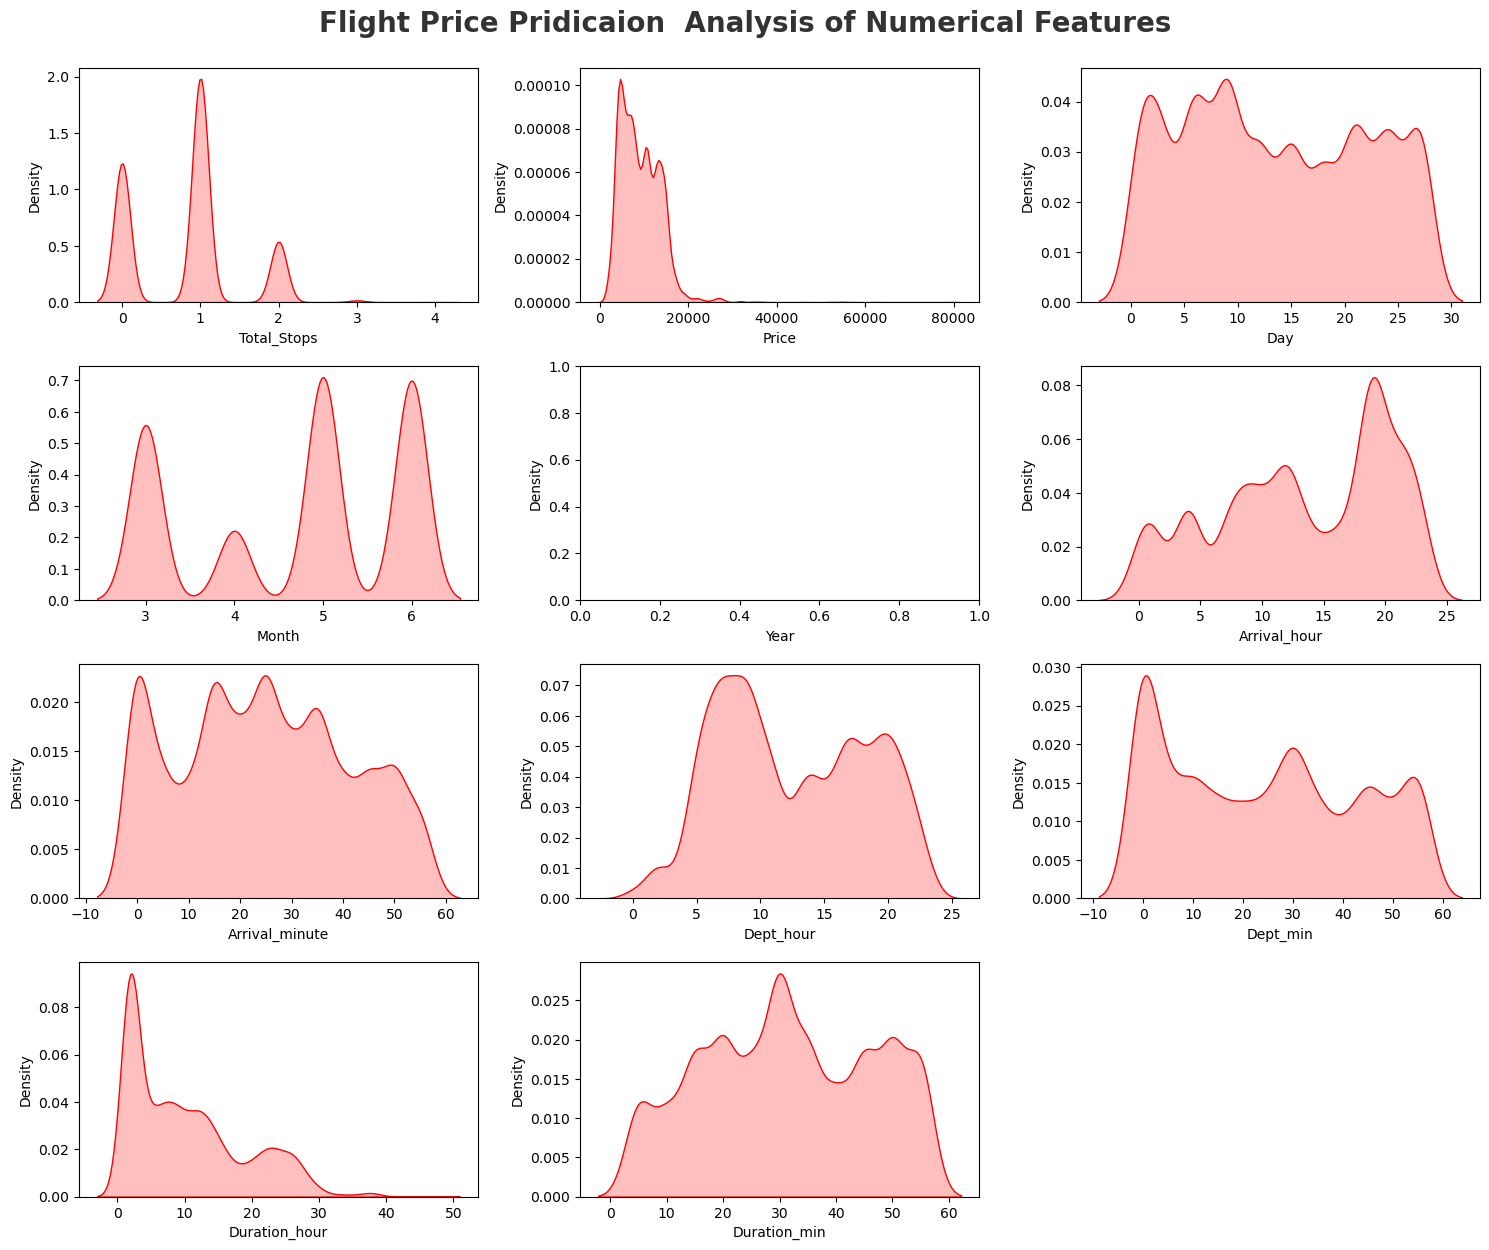

In [220]:
## Visualization Diagrams

plt.figure(figsize=(15, 15))
plt.suptitle('Flight Price Pridicaion  Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='r')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()
    
    